# Effect on Loan Status

#### By Mohamed Gamal Elbayoumi

## Investigation Overview

In this investigation of loan data, I wanted to look at the most common customer status and characteristics,

## Dataset Overview

Prosper Marketplace is America's first peer-to-peer lending marketplace. The dataset contains exactly 113,937 loans from Prosper, and we selected 11 independent features to understand what factors affect a loan's outcome status.  

The loan can be:  Cancelled,  Chargedoff (a declaration by a creditor. This occurs when a consumer becomes severely delinquent on a debt), Completed, Current, Defaulted( is the failure to repay a loan according to the terms agreed to in the promissory note),  FinalPaymentInProgress,  PastDue (between 1 and 120 days): Past due refers to a payment that has not been made by its cutoff time at the end of its due date.

Description 11  features:

- OpenRevolvingAccounts
- DebtToIncomeRatio
- IncomeVerifiable
- LoanOriginalAmount
- LoanStatus
- ProsperScore
- ListingCategory
- EmploymentStatus
- EmploymentStatusDuration
- IsBorrowerHomeowner
- CurrentCreditLines


## Loan Status distribution
Most loans are in current section [about 50%] and followed by completed [33%]. While The remaining [16.7%] is not completed for three reason:

The client becomes severely late on a debt (Charged off) >> 10.53%

Can't afford to repay a loan due to the terms agreed to in the promissory note (Defaulted) >> 4.40%

A payment that hasn't been made by its cutoff time at the end of its due date (Past Due) >> 1.81%.

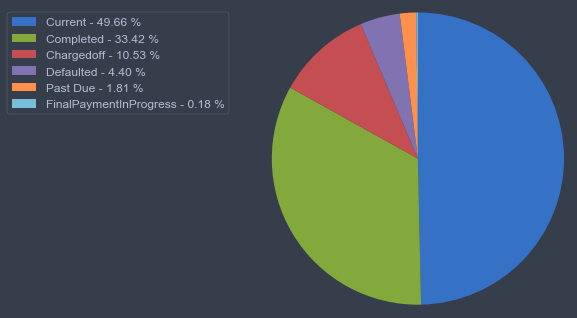

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
no_color = sns.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
df = pd.read_csv('prosperLoanData.csv')
x = np.char.array(['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due', 'FinalPaymentInProgress'])
y = np.array([56576, 38074, 11992, 5018, 2067, 205])
per = 100.*y/y.sum()
patch, text = plt.pie(y, startangle=90, radius=1.2, counterclock = False)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, per)]
sort_legend = True
if sort_legend:
    patch, labels, dummy =  zip(*sorted(zip(patch, labels, y), key=lambda x: x[2], reverse=True))
    
plt.legend(patch, labels, loc='left center', bbox_to_anchor=(-0.1, 1.), fontsize=12)

## Loan Status - Loan Original Amount


the loan status current has the higher loan original amounts, while The loan status defaulted has the lower loan original amounts.

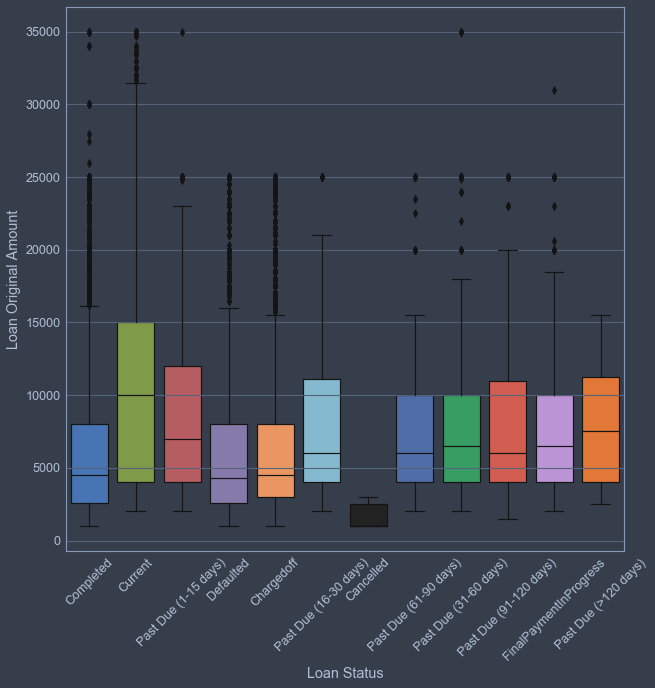

In [4]:
cols = ['EmploymentStatusDuration', 'ListingCategory (numeric)', 'ProsperScore',  'EmploymentStatus',  \
            'OpenRevolvingAccounts', 'IsBorrowerHomeowner', 'CurrentCreditLines',  'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanStatus', 'LoanOriginalAmount']

selected_df = df[cols]
plt.figure(figsize = [10, 10])
color = sns.color_palette()[12]
sns.boxplot(data=selected_df, x='LoanStatus', y='LoanOriginalAmount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=45);

## Loan Status - ProsperScore


Found that clients with higher prosper scores correspond to a loan status completed. Nevertheless, loans charged-off have a lower prosper risk score.


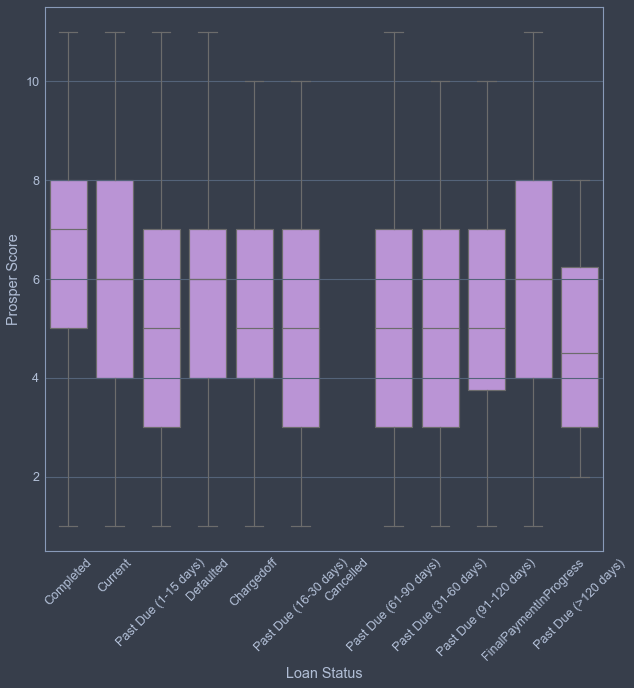

In [6]:
plt.figure(figsize = [10, 10])
color = sns.color_palette()[10]
sns.boxplot(data=selected_df, x='LoanStatus', y='ProsperScore', color = color)
plt.xlabel('Loan Status')
plt.ylabel('Prosper Score')
plt.xticks(rotation=45);